<img alt="logo" height="100" src="img/logo.jpeg" width="100"/>   

# <a id='toc1_'></a>[REGRESIÓN LINEAL](#toc0_)
### <a id='toc1_1_1_'></a>[Definición](#toc0_)
Hay diferentes tipos de regresión lineal, y la más sencilla y práctica para aprender machine learning es la **regresión lineal simple**. Esta consta de una variable independiente y otra variable dependiente, pudiendo existir una relación entre ambas variables que hará que, a medida que aumenta el valor de una la otra lo haga proporcionalmente.  

En estadística, la **regresión lineal simple** (o el ajuste lineal) es un modelo matemático utilizado para encontrar la relación de dependencia entre una variable dependiente (y) y otra independiente (X). En el caso de la regresión lineal múltiple buscaría la relación entre una variable dependiente y 'm' variables independientes.   


 <img width="460" height="300" src="img/linealregresion.png" >   


**Tabla de contenidos**<a id='toc0_'></a>    
- [REGRESIÓN LINEAL](#toc1_)    
    - [Definición](#toc1_1_1_)    
    - [Desarrollo de un modelo de regresión lineal en Python](#toc1_1_2_)    
    - [PASO 1 - GENERACIÓN DEL DATAFRAME (PANDAS) CON LOS DATOS A ANALIZAR](#toc1_1_3_)    
    - [PASO 2 - ANÁLISIS INICIAL DEL CONTENIDO DEL DATAFRAME](#toc1_1_4_)    
    - [PASO 3 - PARTICIONADO DE DATOS PARA GENERAR CONJUNTOS TRAIN Y TEST](#toc1_1_5_)    
    - [PASO 4 - CREACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE](#toc1_1_6_)    
      - [Predicción](#toc1_1_6_1_)    
      - [Visualización de coeficientes mínimos cuadrados W1 y W0](#toc1_1_6_2_)    
    - [Error cuadrático medio - MSE](#toc1_1_7_)    
    - [Coeficientes de determinación (R2)](#toc1_1_8_)    
    - [Graficado](#toc1_1_9_)    
      - [Ploteado de la gráfica de regresión lineal simple](#toc1_1_9_1_)    
      - [Ploteado de la gráfica de relación entre variables del conjunto de datos](#toc1_1_9_2_)    
      - [Ploteado de la gráfica de datos de entrenamiento](#toc1_1_9_3_)    
  - [REGRESIÓN LINEAL (Ejemplo 2)](#toc1_2_)    
      - [Importamos librerías.](#toc1_2_1_1_)    
    - [Generación del dataset simulado](#toc1_2_2_)    
    - [División del dataset en entrenamiento y test](#toc1_2_3_)    
    - [Creación y entrenamiento del modelo de regresión lineal multivariable](#toc1_2_4_)    
    - [Evaluación del modelo con el conjunto de test](#toc1_2_5_)    
    - [Raíz del Error Cuadrático Medio (RMSE)](#toc1_2_6_)    
    - [Coeficiente Determinación (R2)](#toc1_2_7_)    
    - [Análisis evaluativo del modelo](#toc1_2_8_)    
    - [Realización de una predicción sobre datos ficticios](#toc1_2_9_)    
    - [Visualización](#toc1_2_10_)    
  - [NOTA ACLARATORIA](#toc1_3_)    
    - [¿Qué es el intercepto?](#toc1_3_1_)    
  - [REGRESIÓN LINEAL - (Ejemplo 3)](#toc1_4_)    
    - [Análisis evaluativo del modelo](#toc1_4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_2_'></a>[Desarrollo de un modelo de regresión lineal en Python](#toc0_)

Se va a ir generando el código de la regresión lineal simple paso a paso para una mejor compresión 

### <a id='toc1_1_3_'></a>[PASO 1 - GENERACIÓN DEL DATAFRAME (PANDAS) CON LOS DATOS A ANALIZAR](#toc0_)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ------------------------------------
# Crear dataframe con los datos de facturación de clientes
data = {'customer_id': [1, 2, 3, 4, 5],
        'billing_amount': [100, 200, 150, 300, 250],
        'sales': [2, 4, 3, 6, 5]
}
clients = pd.DataFrame(data)

### <a id='toc1_1_4_'></a>[PASO 2 - ANÁLISIS INICIAL DEL CONTENIDO DEL DATAFRAME](#toc0_)

Se muestran, a modo de comprobación,  los datos almacenados en el dataframe

In [2]:
print(clients)

   customer_id  billing_amount  sales
0            1             100      2
1            2             200      4
2            3             150      3
3            4             300      6
4            5             250      5


Se comprueban los tipos de datos contenidos en el conjunto de datos y las dimensiones dataframe

In [3]:
print(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     5 non-null      int64
 1   billing_amount  5 non-null      int64
 2   sales           5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes
None


Se muestra la información sobre las dimensiones del dataframe

In [ ]:
print(clients.shape)

(5, 3)


### <a id='toc1_1_5_'></a>[PASO 3 - PARTICIONADO DE DATOS PARA GENERAR CONJUNTOS TRAIN Y TEST](#toc0_)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(clients['billing_amount'], clients['sales'], random_state=20)

Con esta línea de código indicamos que se cree, genere y divida los datos de cliente en varios conjuntos de datos de entrenamiento y prueba:  

- Datos de entrada: 'customer_id'.
- Variable dependiente: 'billing_amount', importe de facturación del cliente.
- random_state: se genera una semilla aleatoria para dividir los datos de forma consistente cada vez que ejecutamos el código.
- X_train: datos de entrada del conjunto de entrenamiento. Información que se usa para entrenar el modelo.
- X_test: datos de entrada del conjunto de prueba. Información que se usa para testear el rendimiento del modelo ya entrenado.
- y_train: datos de salida del conjjunto de entrenamiento. Información objetivo que se usa para entrenar el modelo.
- y_test: datos de salida del conjunto de prueba. Información objetivo que se usa para testear el rendimiento del modelo ya entrenado.
  
Realizar esta partición es crucial para evaluar el rendimiento del modelo entrenado.

### <a id='toc1_1_6_'></a>[PASO 4 - CREACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE](#toc0_)

In [ ]:
lr = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

#### <a id='toc1_1_6_1_'></a>[Predicción](#toc0_)
Usamos el conjunto de test para realizar la predicción usando el modelo entrenado.

In [7]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

NOTA: X_test contiene los datos de entrada del conjunto de prueba. Con el "reshape(-1,1)" o con ".values.reshape(-1, 1)" se pretende redimensionar la matriz a las dimensiones que requiere el modelo LinearRegression() de SciKit-Learn. Según el conjunto de datos utilizado, es posible añadir directamente la variable o puede que sea necesario redimensionarla usando **reshape** o **values.reshape**.

#### <a id='toc1_1_6_2_'></a>[Visualización de coeficientes mínimos cuadrados W1 y W0](#toc0_)

In [ ]:
print("Coeficiente w1:", lr.coef_)
print("Coeficiente w0:", lr.intercept_)

Coeficiente w1: [0.02]
Coeficiente w0: 4.440892098500626e-16


### <a id='toc1_1_7_'></a>[Error cuadrático medio - MSE](#toc0_)
El **error cuadrático medio (ECM o MSE)** mide la diferencia al cuadrado entre el valor real y el valor predicho en el total de predicciones del modelo de Machine Learning utilizado, mostrando las diferencias más elevadas.  
En estadística, el error cuadrático medio es un estimador que mide el promedio de errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Es un parámetro perfecto para medir la cantidad de error entre dos conjuntos de datos. Una explicación sencilla es decir que compara el valor predicho con el valor conocido, dando como resultado un coeficiente de error.   

Consideraciones

- MSE nunca será negativo ya que los errores se elevan al cuadrado
- El valor del error varía de cero a infinito
- MSE aumenta exponencialmente con un aumento en el error
- Un buen modelo tendrá un valor MSE más cercano a cero. 

In [9]:
print("MSE: ",mean_squared_error(y_test, y_pred))

MSE:  0.0


Por tanto, un valor bajo de MSE supone un muy buen ajuste del modelo.

### <a id='toc1_1_8_'></a>[Coeficientes de determinación (R2)](#toc0_)

El coeficiente de determinación de entrenamiento y de pruebas debe ser parecido. Cuando encontramos que ambos valores tienen una diferencia grande suele significar que el modelo está mal ajustado. El coeficiente de determinación (R2) (R al cuadrado) se utiliza en estadística para cuantificar cómo de cerca están los puntos en la recta de regresión.

In [ ]:
print("Valor del coeficiente de determinación del conjunto de entrenamiento:", round (lr.score(X_train.values.reshape(-1, 1), y_train), 3))
print("Valor del coeficiente de determinación del conjunto de prueba:", round (lr.score(X_test.values.reshape(-1, 1), y_test), 3))

Valor del coeficiente de determinación del conjunto de entrenamiento: 1.0
Valor del coeficiente de determinación del conjunto de prueba: 1.0


### <a id='toc1_1_9_'></a>[Graficado](#toc0_)

#### <a id='toc1_1_9_1_'></a>[Ploteado de la gráfica de regresión lineal simple](#toc0_)

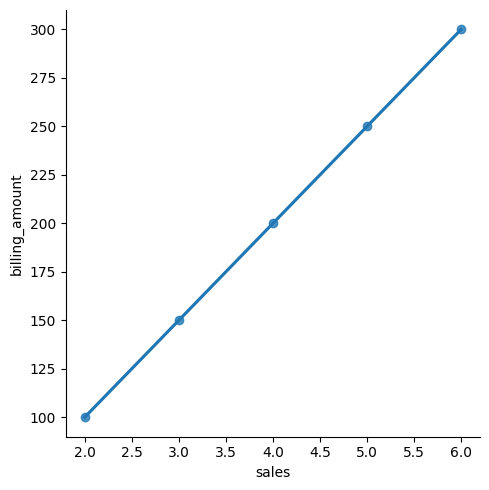

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de regresión lineal usando seaborn
sns.lmplot(x='sales', y='billing_amount', data=clients)
# Mostrar gráfico
plt.show()

#### <a id='toc1_1_9_2_'></a>[Ploteado de la gráfica de relación entre variables del conjunto de datos](#toc0_)

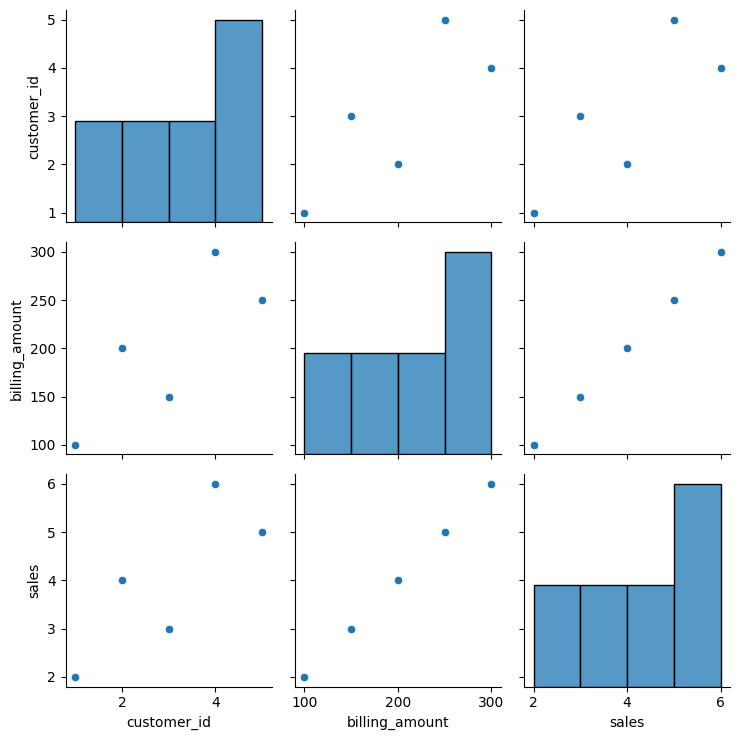

In [ ]:
# Gráfico de relación entre variables del conjunto de datos.
sns.pairplot(clients, height=2.5)
plt.tight_layout()
plt.show()

#### <a id='toc1_1_9_3_'></a>[Ploteado de la gráfica de datos de entrenamiento](#toc0_)

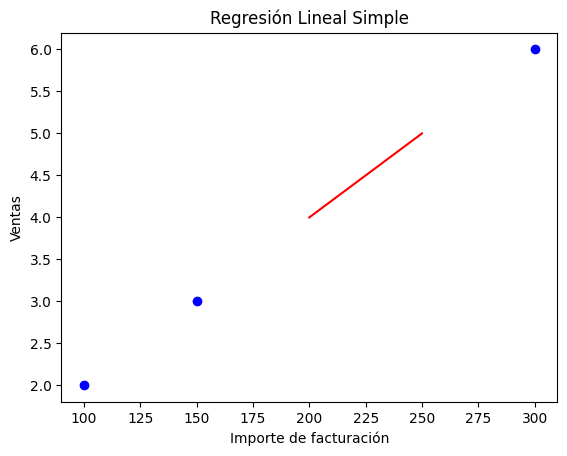

In [13]:
# Graficando los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue')

# Grafica de la regresión lineal con datos de la predicción
plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal Simple')
plt.xlabel('Importe de facturación')
plt.ylabel('Ventas')
plt.show()

Con esto ya tenemos creada una regresión lineal simple con Python.

Esta última gráfica, muestra los puntos de los datos de entrenamiento en color azul y la línea de regresión lineal en rojo.
La línea de regresión lineal representa el modelo que se ha entrenado para hacer predicciones.

La interpretación de la gráfica indica que, a medida que el número de ventas se incrementa, el importe de facturación también aumenta. Esto se ve reflejado en la pendiente positiva de la línea de regresión. Sin embargo, esta es una interpretación basada en una sola variable, si se utilizaran más variables se podría tener una interpretación más precisa y completa.

## <a id='toc1_2_'></a>[REGRESIÓN LINEAL (Ejemplo 2)](#toc0_)

#### <a id='toc1_2_1_1_'></a>[Importamos librerías.](#toc0_)

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### <a id='toc1_2_2_'></a>[Generación del dataset simulado](#toc0_)
Queremos predecir el precio de una vivienda (target) a partir de dos variables:
 - Tamaño en metros cuadrados (X1)
 - Número de habitaciones (X2)

In [46]:

np.random.seed(42)  # para reproducibilidad

# Generamos 200 muestras
n_samples = 200
X1 = np.random.normal(loc=100, scale=20, size=n_samples)  # Tamaño en m²
X2 = np.random.randint(1, 6, size=n_samples)  # Entre 1 y 5 habitaciones

Definimos una relación lineal con cierto ruido.  
Coeficientes: 2000 €/m² y 10000 €/habitación, y un intercepto de 50000 €

In [47]:
error = np.random.normal(loc=0, scale=10000, size=n_samples)  # ruido aleatorio
y = 2000 * X1 + 10000 * X2 + 50000 + error

Combinamos las variables predictoras en un DataFrame

In [48]:
data = pd.DataFrame({
    'Tamaño_m2': X1,
    'Num_Habitaciones': X2,
    'Precio': y
})

In [ ]:
print(data.head())

    Tamaño_m2  Num_Habitaciones         Precio
0  109.934283                 2  301917.795338
1   97.234714                 2  252502.823261
2  112.953771                 1  293614.324819
3  130.460597                 1  327591.755291
4   95.316933                 1  243642.399230


### <a id='toc1_2_3_'></a>[División del dataset en entrenamiento y test](#toc0_)

In [ ]:
X = data[['Tamaño_m2', 'Num_Habitaciones']]
y = data['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### <a id='toc1_2_4_'></a>[Creación y entrenamiento del modelo de regresión lineal multivariable](#toc0_)

In [51]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Imprimimos los coeficientes y el intercepto obtenidos

In [ ]:

print("Intercepto (b₀):", modelo.intercept_)
print("Coeficientes (b₁, b₂):", modelo.coef_)

Intercepto (b₀): 57937.81951953229
Coeficientes (b₁, b₂): [1934.71153978 9749.68263101]


### <a id='toc1_2_5_'></a>[Evaluación del modelo con el conjunto de test](#toc0_)

In [ ]:

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", np.sqrt(mse))
print("Coeficiente de determinación (R²):", r2)


Evaluación del modelo:
Error Cuadrático Medio (MSE): 91368642.96252188
Raíz del Error Cuadrático Medio (RMSE): 9558.69462649173
Coeficiente de determinación (R²): 0.9423903718304878


### <a id='toc1_2_6_'></a>[Raíz del Error Cuadrático Medio (RMSE)](#toc0_)

Se calcula tomando la raíz cuadrada de MSE. Es conocida también como la desviación cuadrática media. Mide la magnitud promedio de los errores y se ocupa de las desviaciones del valor real. Es una estadística imperfecta para la evaluación, pero es muy común. Si se considera el penalizar errores grandes, no es una mala opción. Es una excelente opción para una métrica de pérdida cuando se ajustan los HiperParametros o se entrena por bloque una red neuronal profunda.

Consideraciones:

- RMSE con valor 0 indica que el modelo tiene un ajuste perfecto.
- Cuanto menor sea el RMSE, mejor será el modelo y sus predicciones.

In [ ]:
print("Raíz del Error Cuadrático Medio (RMSE):", np.sqrt(mse))

Raíz del Error Cuadrático Medio (RMSE): 9558.69462649173


### <a id='toc1_2_7_'></a>[Coeficiente Determinación (R2)](#toc0_)

También conocido como prueba de bondad de ajuste, es una métrica que indica el rendimiento del modelo, nos indica que tanta variación tiene la variable dependiente que se puede predecir desde la variable independiente.    
En otras palabras, representa la ***"fuerza del ajuste"*** de que tan bien se ajusta el modelo a las observaciones reales que tenemos, sin embargo, no dice nada sobre el modelo en sí, no indica si es bueno malo, si los datos están sesgados o si hemos elegido el método correcto.

Consideraciones:

El valor de R² varía de 0 a 1; los valores más altos indican un ajuste fuerte y los valores más bajos indican un ajuste débil.

- R² < 0,5 → Ajuste débil
- 0,5 ≤ R² ≤ 0,8 → Ajuste moderado
- R² > 0,8 → Ajuste fuerte



In [ ]:
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): 0.9423903718304878


### <a id='toc1_2_8_'></a>[Análisis evaluativo del modelo](#toc0_)
Dado que la variable dependiente es un **precio** y se encuentra en el rango de **cientos de miles**, podemos interpretar los resultados de la siguiente manera:

1. **R² (0.9423)**  
   - Indica que aproximadamente el **94.23%** de la variabilidad en los precios está siendo explicada por el modelo, lo cual es muy elevado y sugiere que el modelo capta gran parte de los factores que inciden en el precio.

2. **MSE (~ 91,368,642.96) y RMSE (~ 9,558.69)**  
   - El **RMSE** se interpreta en las mismas unidades de la variable objetivo: aquí, en términos monetarios.  
   - Si los precios promedio se ubican, por ejemplo, alrededor de 200,000 o 300,000, un error de unos 9,558 podría representar un error relativo del **3% al 5%** aproximadamente, lo cual puede considerarse razonable o incluso bueno en muchos contextos de predicción de precios.  
   - Conviene siempre compararlo con el rango real de precios. Si la mayoría de las propiedades se sitúan en 250,000 - 350,000, un error promedio de 9,558 puede ser un margen aceptable.  

**Interpretación general del modelo**  
   - El **alto valor de R²** (0.94) y un **RMSE moderado** en el contexto de precios de cientos de miles de unidades monetarias sugieren que el modelo está funcionando de manera adecuada.  
   - Sería prudente, además, la **distribución de errores** (por ejemplo, si hay viviendas muy costosas o muy baratas que elevan el error de manera significativa o si hay heterocedasticidad (mayor dispersión para valores mayores y menor dispersión para valores menores de la variable objetivo/dependiente)) puede ayudar a detectar posibles problemas en segmentos específicos del rango de precios.  

En conclusión, dada la escala de cientos de miles, un **RMSE de aproximadamente 9,558** parece aceptable y, combinado con un **R² de 0.94**, indica que el modelo logra explicar la mayor parte de la variación en el precio y lo hace con un margen de error relativamente bajo en términos porcentuales. 

### <a id='toc1_2_9_'></a>[Realización de una predicción sobre datos ficticios](#toc0_)
Supongamos una vivienda de 120 m² y 3 habitaciones

In [ ]:
nuevos_datos = np.array([[120, 3]])
prediccion = modelo.predict(nuevos_datos)
print("\nPredicción para una vivienda de 120 m² y 3 habitaciones:", prediccion[0])


Predicción para una vivienda de 120 m² y 3 habitaciones: 319352.252185602


### <a id='toc1_2_10_'></a>[Visualización](#toc0_)
Aunque la regresión es multivariable y la visualización completa es compleja,
graficaremos la relación real vs. predicha en el conjunto de test.

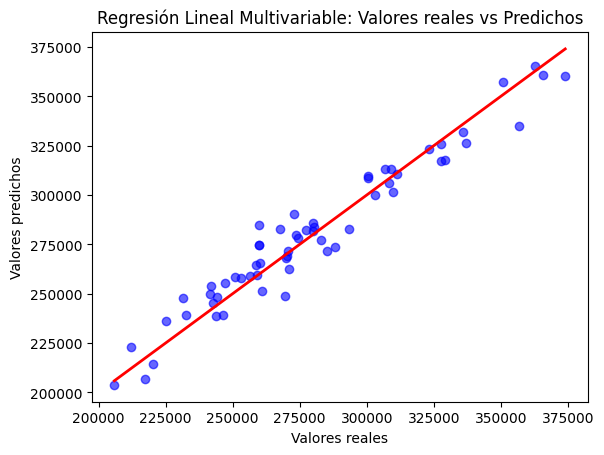

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión Lineal Multivariable: Valores reales vs Predichos')
plt.show()

## <a id='toc1_3_'></a>[NOTA ACLARATORIA](#toc0_)

### <a id='toc1_3_1_'></a>[¿Qué es el intercepto?](#toc0_)

El **intercepto** es el valor de la variable objetivo (la que queremos predecir) cuando todas las variables independientes (o predictoras) son iguales a cero. Es decir, es el "punto de partida" del modelo.

En la fórmula de una regresión lineal, normalmente se expresa de la siguiente manera:

\[
y = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n
\]

donde:
- **\(y\)** es la variable que queremos predecir.
- **\(b_0\)** es el intercepto.
- **\(b_1, b_2, \dots, b_n\)** son los coeficientes o pendientes correspondientes a cada variable independiente \(x_1, x_2, \dots, x_n\).

Por lo tanto, cuando \(x_1 = 0, x_2 = 0, \dots, x_n = 0\), la ecuación se reduce a:

\[
y = b_0
\]

En este contexto, **\(b_0\)** indica el valor base o el punto en el que se sitúa la gráfica de la relación cuando no hay influencia de los demás factores.

---

En resumen, el intercepto es un parámetro clave que ayuda a situar la línea de regresión en el eje de la variable a predecir.

## <a id='toc1_4_'></a>[REGRESIÓN LINEAL - (Ejemplo 3)](#toc0_)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [59]:
from sklearn import datasets

In [60]:
housing_dataset =  pd.read_csv('/workspaces/DATASCIENCE/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/datasets/bostonDataset.csv')  
housing_dataset.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [28]:
housing_dataset.shape

(506, 16)

Eliminamos columna TOWN (es una String)

In [61]:
housing_dataset.drop(['TOWN'], axis='columns', inplace=True)

- CRIM - índice de delincuencia per cápita por ciudad
- ZN - proporción de suelo residencial para parcelas de más de 25.000 pies cuadrados
- INDUS - proporción de acres comerciales no minoristas por ciudad
- CHAS - Variable ficticia del río Charles (= 1 si la zona linda con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a autopistas radiales
- TAX - tipo del impuesto sobre bienes inmuebles por cada 10.000 dólares
- PTRATIO - ratio alumnos-profesor por ciudad
- B - 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT - % de estatus inferior de la población
- MEDV - Valor medio de las viviendas ocupadas por sus propietarios en 1000 $ (objetivo)

In [62]:
plt.rcParams["figure.figsize"] = (8, 6)
corr = housing_dataset.corr()
corr

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
TRACT,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678
LON,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602
LAT,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527
MEDV,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655
CRIM,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,-0.569807,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501


<Axes: >

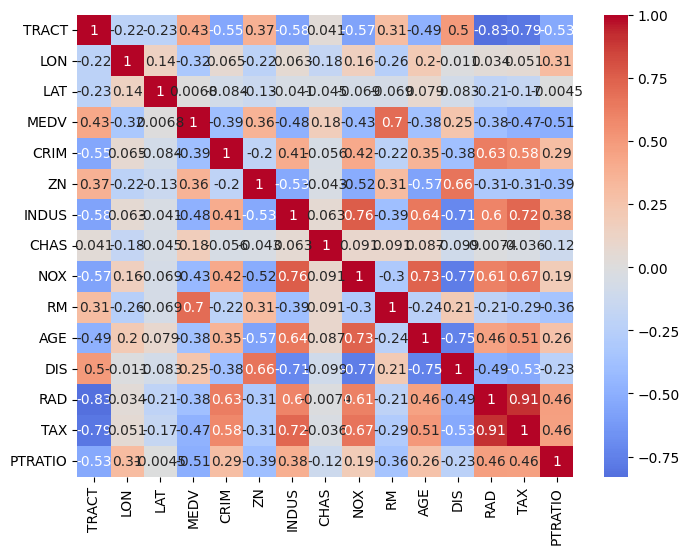

In [63]:
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

In [64]:
X=housing_dataset.drop(['MEDV'], axis=1)
y=housing_dataset.filter(['MEDV'], axis=1)

In [65]:
X.head()

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,2011,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,2021,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,2022,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,2031,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,2032,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [66]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
house_predictor=LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)

In [69]:
print('Error Medio Absoluto - Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio - Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Medio Absoluto - Mean Absolute Error (MAE): 3.399704535554148
Error Cuadrático Medio - Mean Squared Error (MSE): 28.9936897024914
Root Mean Squared Error: 5.38457887884386


El valor MAE muestra que, por término medio, hay un error de 3,X dólares entre los valores reales y los previstos para la columna MEDV.

EL Error Cuadrático Medio (MSE) es una de las funciones de pérdida de regresión más comunes. En el error cuadrático medio, también conocido como pérdida L2, calculamos el error elevando al cuadrado la diferencia entre el valor predicho y el valor real y promediando el conjunto de datos.   
Representa la distancia al cuadrado entre los valores reales y predichos. Se eleva al cuadrado para evitar la cancelación de términos negativos.   


### <a id='toc1_4_1_'></a>[Análisis evaluativo del modelo](#toc0_)

- Mean Absolute Error (MAE) ≈ 3.40
Esto indica que, en promedio, la predicción se desvía 3.40 miles de dólares (es decir, $3,400) del valor real.
- Mean Squared Error (MSE) ≈ 28.99 y Root Mean Squared Error (RMSE) ≈ 5.38
El RMSE indica que, en promedio, el error de predicción es de 5.38 miles de dólares (unos $5,380).   

Que el RMSE sea mayor que el MAE (5.38 vs 3.40) sugiere que existen algunos casos con errores más grandes que elevan el promedio cuadrático. (posible existencia de Outliers!?)